In [1]:
import g2fit
from g2fit.helpers import FullOmegaAFit
import g2fit.fitting as fitting
import ROOT as r 
import matplotlib.pyplot as plt 
import matplotlib
import hist
import uproot
import numpy as np 

Welcome to JupyROOT 6.24/06


In [2]:
ding = FullOmegaAFit('this is a phrase', FullOmegaAFit.valid_params[:5])

Fitting with 5 parameters: ['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


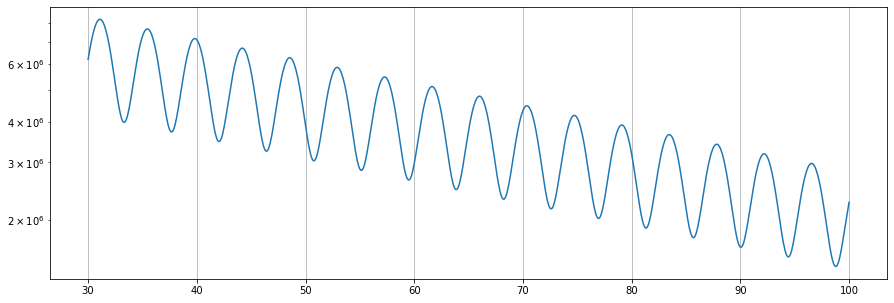

In [26]:
guess = [10_000_000, 0.333, 64., 64.44, 2.33]
xs = np.linspace(30,100,1000)
ystruth = ding(xs,guess)

fig,ax = plt.subplots(figsize=(15,5))
plt.plot(xs,ystruth)
plt.yscale("log")
plt.grid()
plt.show()

In [23]:
h = hist.Hist(hist.axis.Regular(4700,0,700))
h.axes[0].size

4700

In [24]:
h.reset()
ys = ding(h.axes[0].centers, guess)
for i in range(h.axes[0].size):
    xi = h.axes[0].centers[i]
    h.fill(h.axes[0].centers[i], weight=ys[i] + np.random.normal(0, np.sqrt(ys[i])))

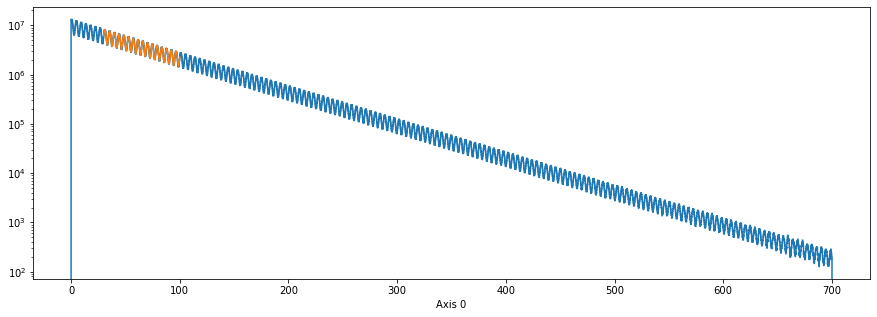

In [28]:
fig,ax = plt.subplots(figsize=(15,5))
h.plot()
plt.plot(xs,ystruth)
plt.yscale("log")
plt.show()

In [29]:
fit = fitting.PyFit.from_hist(
    h, ding, guess, limits=(30,700)
)

In [30]:
fit.fit()

In [31]:
fit.m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4570 (chi2/ndof = 1.0)     │              Nfcn = 353              │
│ EDM = 4.1e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │10.00052e6 │ 0.00034e6 │ -0.00034e6 │ 0.00034e6  │         │         │       │
│ 1 │ p1   │333.013e-3 │ 0.026e-3  │ -0.026e-3  │  0.026e-3  │         │         │       │
│ 2 │ p2   │   63.1    │    0.9    │    -0.9    │    0.9     │         │         │       │
│ 3 │ p3   │  64.4374  │  0.0012   │  -0.0012   │   0.0012   │         │         │       │
│ 4 │ p4   │  2.33016  │  0.00014  │  -0.00014  │  0.00014   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          p0           │          p1           │          p2           │          p3           │          p4           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.34e3  │  0.34e3   │ -0.026e-3 │ 0.026e-3  │   -0.9    │    0.9    │  -0.0012  │  0.0012   │ -0.14e-3  │  0.14e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────────────────────────────────────┐
│    │        p0        p1        p2        p3        p4 │
├────┼───────────────────────────────────────────────────┤
│ p0 │  1.15e+05 -0.000177     0.933    -0.346 -0.000206 │
│ p1 │ -0.000177  6.78e-10  1.15e-07  4.64e-10 -2.63e-11 │
│ p2 │     0.933  1.15e-07     0.752 -2.54e-06 -0.000102 │
│ p3 │    -0.346  4.64e-10 -2.54e-06  1.53e-06  5.57e-10 │
│ p4 │ -0.000206 -2.63e-11 -0.000102  5.57e-10  2.04e-08 │
└────┴───────────────────────────────────────────────────┘

/home/jlab/github/g2_analysis/submodules/g2fit/fitting.py:292: VisibleDeprecationWarning: propagate is deprecated: use jacobi.propagate instead from jacobi library
  _, ycov = propagate(ding, self.m.values, self.m.covariance)


jacobi: iter=3 no convergence
[2.90768962e+02 2.94210058e+02 2.94333178e+02 ... 5.92931104e-02
 6.03520762e-02 6.01823854e-02]


(<Figure size 1440x576 with 4 Axes>,
 {'A': <AxesSubplot:label='A'>,
  'D': <AxesSubplot:label='D'>,
  'B': <AxesSubplot:label='B'>,
  'C': <AxesSubplot:label='C'>})

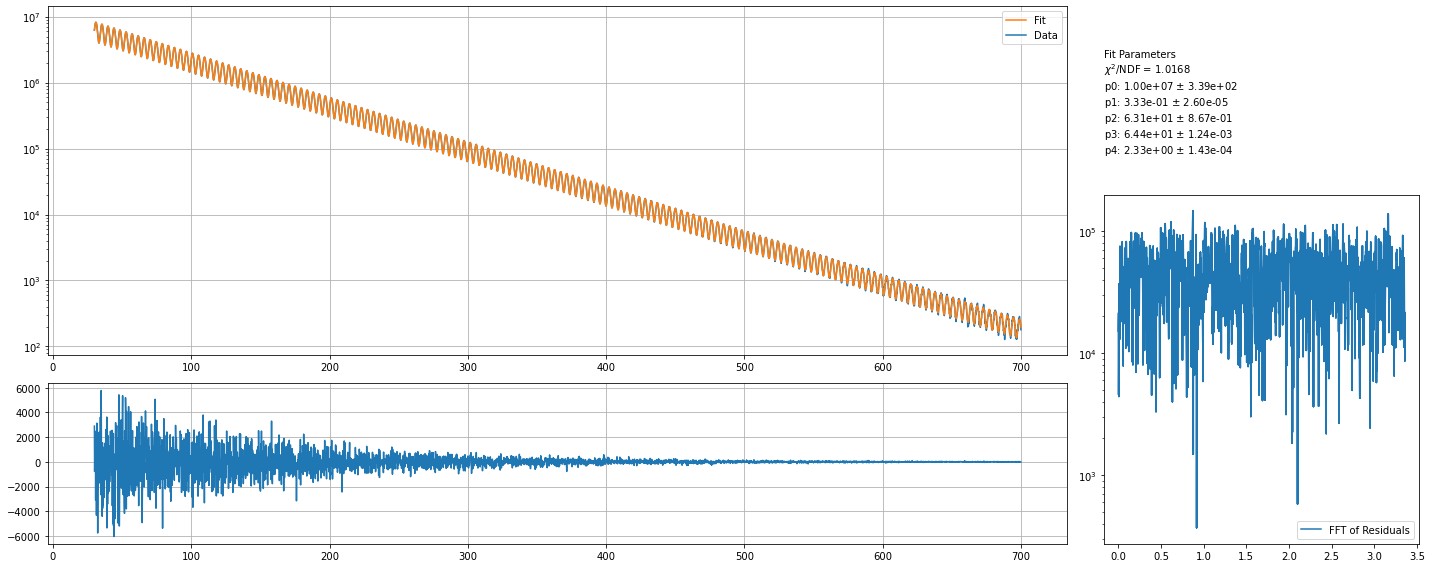

In [32]:
fit.plot()

---

### Now create a pure root implementation of the same fit

In [33]:
h2 = r.TH1D("h2", "Wiggle Plot; Time [#mus]", h.axes[0].size,h.axes[0].edges[0],h.axes[0].edges[-1])
for i in range(h2.GetNbinsX()):
    h2.SetBinContent(i+1, h[i])

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


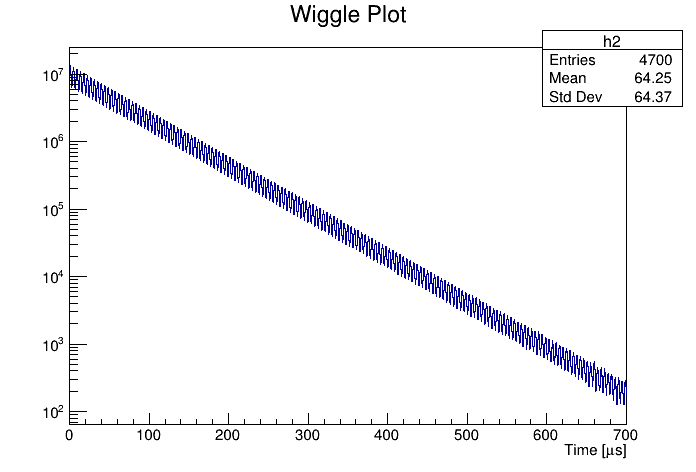

In [34]:
c = r.TCanvas()
h2.Draw()
c.SetLogy()
c.Draw()

In [35]:
FullOmegaAFit.valid_params[:5]

['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']

In [36]:
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
# import ROOT as r

getBlinded = Blinders(FitType.Omega_a, ding.blinding_phrase)

def blinded_wiggle(x, p):
    norm  = p[0]
    asym  = p[1]
    R     = p[2]
    life  = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * np.exp(-time/life) * (1 - asym*np.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [37]:
func = r.TF1("func", blinded_wiggle, 30,700,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(*guess)
func.SetLineColor(2)
func.SetNpx(1000)

 FCN=4569.55 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         330 TOTAL
                     EDM=5.71773e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.00005e+07   3.39353e+02  -8.47139e-02   4.67908e-12
   2  #tau         3.33013e-01   2.60453e-05  -5.86916e-10   2.90941e-05
   3  A            6.30942e+01   8.67411e-01  -6.59097e-05   7.72537e-08
   4  R            6.44374e+01   1.23570e-03   2.92510e-07  -2.31472e-05
   5  #phi         2.33016e+00   1.42659e-04   1.42659e-04   8.57495e-04


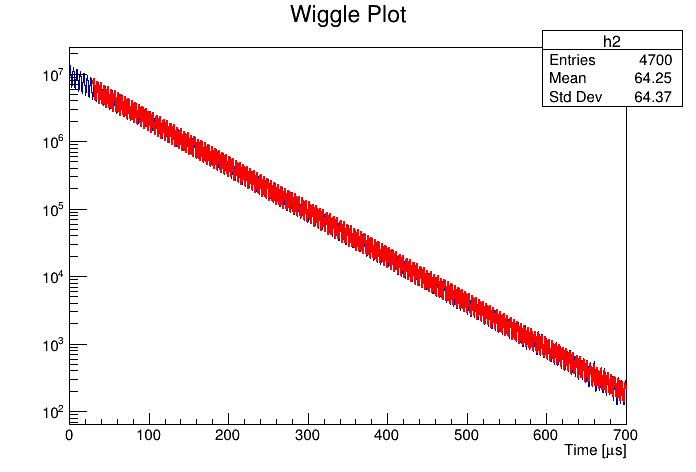

In [38]:
c = r.TCanvas()
h2.Draw()
h2.Fit(func, 'REMB')
func.Draw("SAME")
c.SetLogy()
c.Draw()

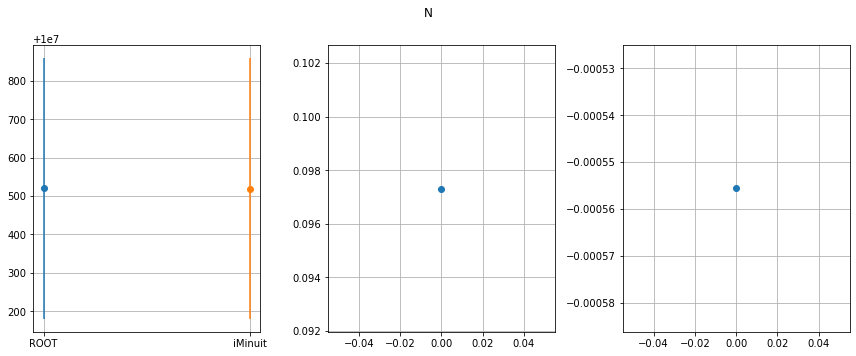

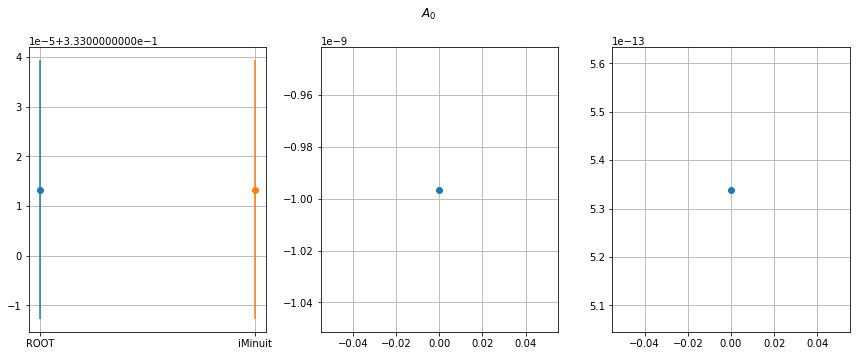

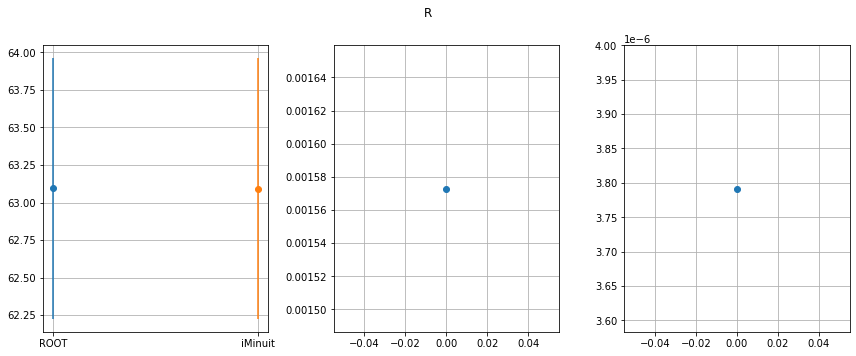

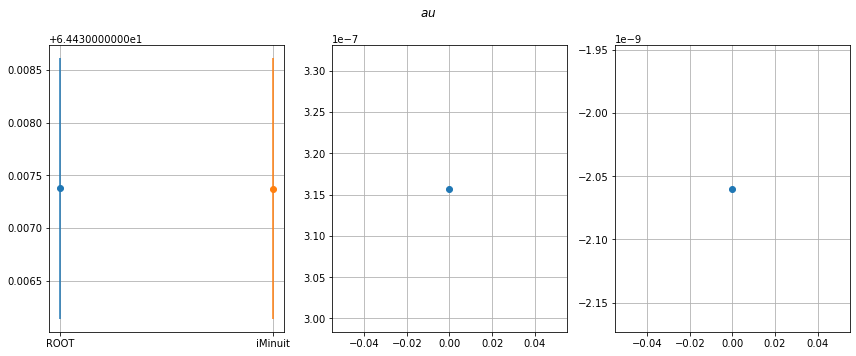

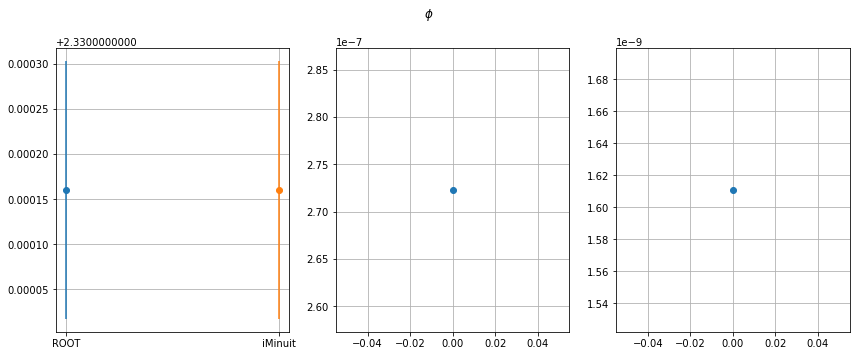

In [45]:
npar=5
for i in range(npar):
    fig,ax = plt.subplots(1,3,figsize=(12,5))
    plt.suptitle(FullOmegaAFit.valid_params[i])
    plt.sca(ax[0])
    plt.errorbar(['ROOT'], [   func.GetParameter(i)], yerr=[func.GetParError(i)], fmt="o")
    plt.errorbar(['iMinuit'], [fit.m.values[i]], yerr=[fit.m.errors[i]], fmt="o")
    plt.tight_layout()
    plt.grid()

    plt.sca(ax[1])
    plt.plot([func.GetParameter(i)-fit.m.values[i]],"o")
    plt.grid()

    plt.sca(ax[2])
    plt.plot([func.GetParError(i)-fit.m.errors[i]],"o")
    plt.grid()

    plt.tight_layout()
    plt.show()

---

### Do the above test a number of times and record the parameters for each fit

In [46]:
def make_t_method(guess):
    ding = FullOmegaAFit('this is a phrase', FullOmegaAFit.valid_params[:5])

    # %%
    h = hist.Hist(hist.axis.Regular(4700,0,700))
    h.axes[0].size

    # %%
    h.reset()
    ys = ding(h.axes[0].centers, guess)
    for i in range(h.axes[0].size):
        xi = h.axes[0].centers[i]
        h.fill(h.axes[0].centers[i], weight=ys[i] + np.random.normal(0, np.sqrt(ys[i])))

    return h, ding
    

def do_fit_and_get_parameters(h, ding, guess):

    fit = fitting.PyFit.from_hist(
        h, ding, guess, limits=(30,700)
    )

    # %%
    fit.fit()

    # %%
    # fit.m

    # %%
    # fit.plot()

    h2 = r.TH1D("h2", "Wiggle Plot; Time [#mus]", h.axes[0].size,h.axes[0].edges[0],h.axes[0].edges[-1])
    for i in range(h2.GetNbinsX()):
        h2.SetBinContent(i+1, h[i])

    # %%
    # c = r.TCanvas()
    # h2.Draw()
    # c.SetLogy()
    # c.Draw()


    func = r.TF1("func", blinded_wiggle, 30,700,5)
    func.SetParNames('N','#tau','A','R','#phi')
    func.SetParameters(*guess)
    func.SetLineColor(2)
    func.SetNpx(1000)

    h2.Fit(func, 'REMBQ')

    return ((fit.m.values, fit.m.errors), ([func.GetParameter(i) for i in range(5)], [func.GetParError(i) for i in range(5)]))


In [48]:
params = []
for i in range(100):
    h, ding = make_t_method(guess)
    these = do_fit_and_get_parameters(h, ding, guess)
    print(these)
    params.append(these)
    # break

Fitting with 5 parameters: ['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']
((<ValueView p0=9999841.552285096 p1=0.332992621568632 p2=63.32867741010525 p3=64.44078941603765 p4=2.3302446209858374>, <ErrorView p0=339.3453328100862 p1=2.6045282866502925e-05 p2=0.8674238257260474 p3=0.0012358750342646517 p4=0.0001426618235421625>), ([9999841.561847318, 0.3329926215536554, 63.32866613386839, 64.44078937969557, 2.330244622715485], [339.3446482330744, 2.6045275833645206e-05, 0.8673975441192218, 0.0012358726242650121, 0.00014265863888900747]))
Fitting with 5 parameters: ['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']
((<ValueView p0=9999629.458856419 p1=0.3329898989634151 p2=63.53801289126329 p3=64.44162978303065 p4=2.3300273477888447>, <ErrorView p0=339.31511056403554 p1=2.604527618204373e-05 p2=0.8671646365862972 p3=0.0012357718768145924 p4=0.00014264105450470087>), ([9999630.084512258, 0.3329899004766901, 63.53529512634981, 64.44162926555676, 2.330027935937639], [339.3146098806994, 2.6045265060227665e

In [50]:
import pickle
with open("./data/test_fitter.pickle", 'wb') as fout:
    pickle.dump(params, fout)

In [ ]:
# with open("./data/test_fitter.pickle", 'rb') as fin:
#     params = pickle.load(fin)

In [55]:
pypars =   [x for x in zip(*[x[0][0] for x in params])]
pyerrs =   [x for x in zip(*[x[0][1] for x in params])]
rootpars = [x for x in zip(*[x[1][0] for x in params])]
rooterrs = [x for x in zip(*[x[1][1] for x in params])]

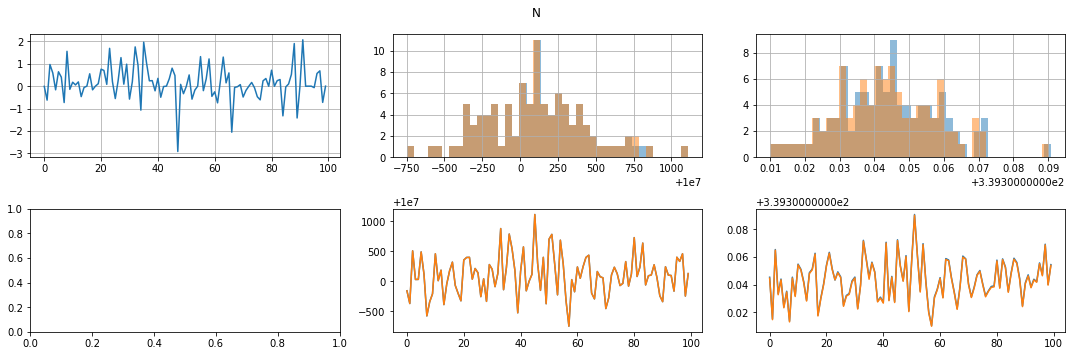

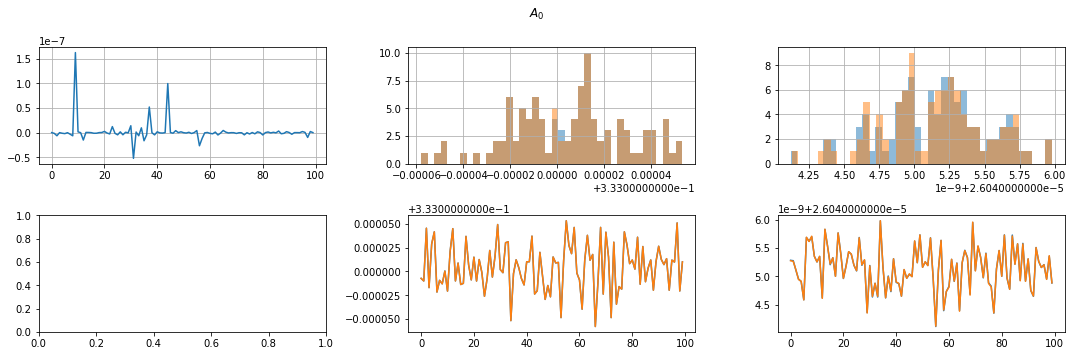

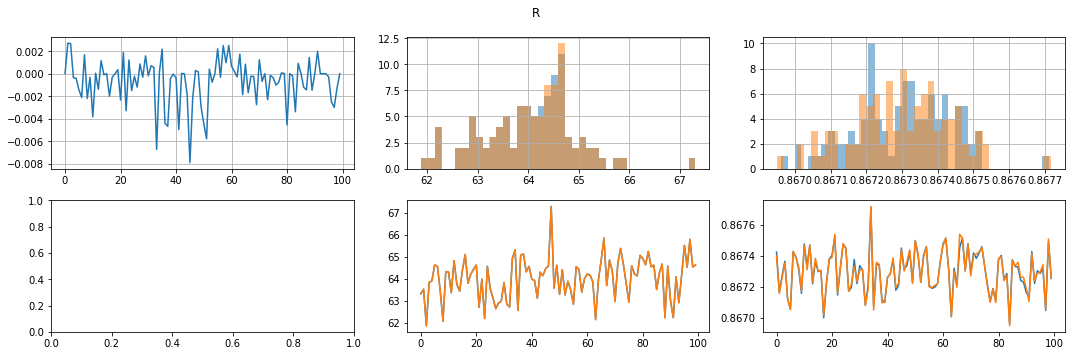

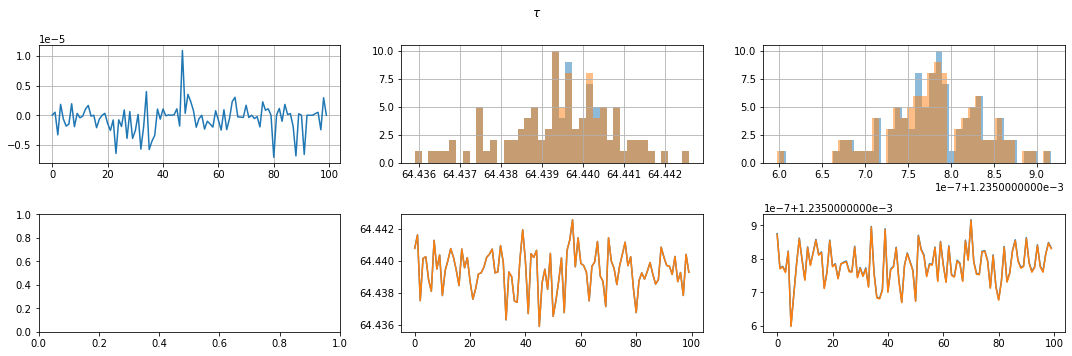

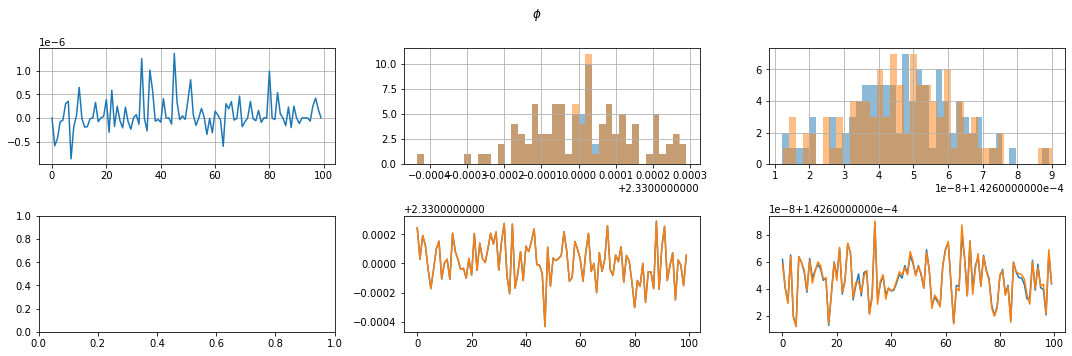

In [72]:
for i in range(5):
    fig,ax2 = plt.subplots(2,3,figsize=(15,9))
    # ax[0].plot((np.array(pypars[i])- np.array(rootpars[i]))/(np.array(pypars[i])))
    ax = ax2[0]
    ax[0].plot((np.array(pypars[i])- np.array(rootpars[i])))

    ax[1].hist(pypars[i],bins=40, alpha=0.5)
    ax[1].hist(rootpars[i],bins=40, alpha=0.5)
    ax[1].set_ylabel("Fit Value")
    

    ax[2].hist(pyerrs[i],bins=40, alpha=0.5)
    ax[2].hist(rooterrs[i],bins=40, alpha=0.5)
    ax[2].set_ylabel("Fit Error")

    for axi in ax:
        axi.grid()

    ax2[1][1].plot(pypars[i])
    ax2[1][1].plot(rootpars[i])
    ax2[1][1].set_ylabel("Fit Value")
        

    ax2[1][2].plot(pyerrs[i])
    ax2[1][2].plot(rooterrs[i])
    ax2[1][2].set_ylabel("Fit Error")


    plt.suptitle(FullOmegaAFit.valid_params[i].replace("\t","\\t"))
    plt.tight_layout()

    plt.show()
    # break